# CNN hello world

这是一个最经典的入门CNN的模型－－数字识别。

## CNN基本结构

简单说下CNN的基本结构，这块主要参考了：[零基础理解卷积神经网络](https://zhuanlan.zhihu.com/p/32472241)，也参考了：[卷积神经网络简介](https://zhuanlan.zhihu.com/p/25249694)，[卷积神经网络CNN学习](https://zhuanlan.zhihu.com/p/31919653)，[禅与奶罩识别艺术](https://zhuanlan.zhihu.com/p/25774111)。直接的直观解释可以看看：[能否对卷积神经网络工作原理做一个直观的解释？](https://www.zhihu.com/question/39022858/answer/81026163)

首先是一些简单背景。2012年就在图像识别领域迅速崛起，应用最多的领域也是图像处理。假如一张jpg图片480\*480大小，那么它在计算机中的数组就是480\*480\*3，这张图片是狗的图片，计算机如何识别其特征呢？计算机可以通过识别更低层次的特征（曲线，直线）来进行图像识别。具体点，就是**用卷积层识别这些特征，并通过更多层卷积层结合在一起，就可以像人类一样识别出爪子和腿之类的高层次特征**，从而完成任务。这正是CNN所做的事情的大概脉络。

它与生物学有点关联－－在一个系统中，一些特定的组件发挥特定的作用（视觉皮层中的神经元寻找各自特定的特征）。这是CNN背后的基本原理，不同的卷积核寻找图像中不同的特征。

接着就是神经网络结构了。CNN的工作流程是这样的：你把一张图片传递给模型，经过一些**卷积层**，**非线性化（激活函数）**，**池化**，以及**全连层**，最后得到结果。就像我们之前所说的那样，输出可以是单独的一个类型，也可以是一组属于不同类型的概率。接下来简单记录下各个层的作用。

### 卷积层

先介绍下关于卷积的概念，这个概念在信号学中是基础概念，可以参考这里：[“卷积”其实没那么难以理解](https://zhuanlan.zhihu.com/p/41609577)，核心一句话摘抄一下：卷积将是**过去所有连续信号经过系统的响应之后得到的在观察那一刻的加权叠加**。

然后在CNN中的概念可以参考这里：[CNN 入门讲解：什么是卷积（Convolution）?](https://zhuanlan.zhihu.com/p/30994790)和这里：[谈谈离散卷积和卷积神经网络](https://liam.page/2017/07/27/convolutions-and-convolution-neural-network/)，还有这个：[卷积神经网络（CNN）之一维卷积、二维卷积、三维卷积详解](https://www.cnblogs.com/szxspark/p/8445406.html),[【模型解读】从2D卷积到3D卷积，都有什么不一样](https://zhuanlan.zhihu.com/p/55567098)。看下卷积公式：
$$\int _{-\infty}^{\infty} f(\tau)g(x-\tau)d\tau$$
同前面说的一样，其物理意义大概可以理解为：系统**某一时刻的输出是由多个输入共同作用（叠加）的结果**。放在图像分析里，f(x) 可以理解为**原始像素点**(source pixel)，所有的**原始像素点叠加起来，就是原始图**了。g(x)可以称为**作用点**，**所有作用点合起来我们称为卷积核**（Convolution kernel）

卷积核上**所有作用点依次作用于原始像素点后**（即乘起来），**线性叠加的输出结果**，即是最终卷积的输出，也是我们想要的结果，我们称为destination pixel. 如下图所示：

![](v2-c9b00043ba326451979abda5417bfcdf_hd.jpg)

最左边呢就是我们原始输入图像了，中间呢是卷积层，-8就是卷积的结果。

为啥要用卷积？这就涉及几个图像方面的概念，比如边缘检测，边缘检测基本内容是**先检测边缘**，然后**把边缘叠加到原来的边缘上**，原本图像边缘的值如同被加强了一般，亮度没有变化，但是更加锐利。

一般是什么操作去检测边缘呢？先来看一，二阶微分。

对于一维函数f（x），其一阶微分的基本定义是差值：
$$\frac{\partial f}{\partial x} = f(x+1)-f(x)$$

二阶微分定义成差分：
$$\frac{\partial ^2 f}{\partial x^2} = f(x+1)+f(x-1)-2f(x)$$

看个例子，看边缘的灰度分布图以及将一二阶微分作用于边缘上：

![](v2-a894947c4a277a8a389eb04934cee5a1_hd.jpg)

可以看到，在边缘（也就是台阶处），二阶微分值非常大，其他地方值比较小或者接近0 。那我们就会得到一个结论，**微分算子的响应程度与图像在用算子操作的这一点的突变程度成正比**，这样，**图像微分增强边缘和其他突变**（如噪声），而**削弱灰度变化缓慢**的区域。也就是说，微分算子（尤其是二阶微分），对边缘图像非常敏感。

看完一维的，看下二维图像函数的拉普拉斯算子：
$$\nabla ^2 f=\frac{\partial ^2 f}{\partial x^2}+\frac{\partial ^2 f}{\partial y^2} = f(x+1,y)+f(x-1,y)-2f(x,y)+f(x,y+1)+f(x,y-1)-2f(x,y)$$

放到图上看，以x,y 为坐标轴中心点，来重新表达这个算子，就可以是：

![](v2-121b2aa6333fb0369459535cbb5d5b69_hd.jpg)

这个就和上面提到的卷积核(Convolutional kernel)有点像了啦。将原图像和拉普拉斯图像叠加在一起，就可以得到锐化后的结果了，这里就不再赘述了，基本上这个概念应该也蛮清楚了。

额外补充一点：同样提取某个特征，经过不同卷积核卷积后效果也不一样（这是个重点，为什么说重点，因为CNN里面卷积核的大小就是有讲究的）。

关于卷积更多的形式，可以参考这个：[入门：概览深度学习中的卷积结构](https://zhuanlan.zhihu.com/p/29715598)，或者这个：[一文了解各种卷积结构原理及优劣](https://zhuanlan.zhihu.com/p/28186857)，这个：[CNN中千奇百怪的卷积方式大汇总](https://zhuanlan.zhihu.com/p/29367273)

那么在CNN中，卷积在做什么？是怎么起到作用的呢？

从更高角度来说，每一个卷积核都可以被看做**特征识别器**。我所说的特征，是指直线、简单的颜色、曲线之类的东西。比如：

![](v2-72360d0b12c1d67d50ecc373a92bee44_hd.jpg)

假设我们要把下面这张图片分类。让我们把我们手头的这个卷积核放在图片的左上角。

![](v2-e329ce17f47f3c616d071fdd093694b9_hd.jpg)

基本上，如果输入图像中**有与卷积核代表的形状很相似的图形**，那么**所有乘积的和会很大**。如果我们移动了卷积核，遇到的都是不相似的部分，那么得到的值小多了。**卷积层的输出是一张激活图**。所以，在单卷积核卷积的简单情况下，假设卷积核是一个曲线识别器，那么所得的激活图会显示出哪些地方最有可能有曲线。但这只是**一个卷积核的情况**，只有一个找出向右弯曲的曲线的卷积核。可以**添加其他卷积核**，比如识别向左弯曲的曲线的。**卷积核越多，激活图的深度就越深**，我们得到的**关于输入图像的信息就越多**。

那么进一步看看卷积层到底是怎么作用的。可以参考：[CNN入门讲解：卷积层是如何提取特征的？](https://zhuanlan.zhihu.com/p/31657315)和[卷积神经网络CNN完全指南终极版（一）](https://zhuanlan.zhihu.com/p/27908027).

现在已经知道卷积可以提取特征，但是也不能随机找图像的pixels进行卷积吧，想想卷积输出的特征图（feature map）,除了特征值本身外，还包含相对位置信息，比如人脸检测，眼睛，鼻子，嘴巴都是从上到下排列的。那么提取出的相应的特征值也是按照这个**顺序**排列的。所以卷积的方式也希望按照正确的顺序来。因此实现卷积运算最后的方式就是**从左到右，每隔x列Pixel，向右移动一次卷积核**进行卷积(x可以自己定义)。当已经到最右，就**从上到下，每隔X行pixel,向下移动一次卷积核**，移动完成，再继续如上所述，从左到右进行。比如：

![](v2-0e86ac3e69a31e47477f658b76842c7c_hd.jpg)
![](v2-8d0c46394cac2f192e236c7cffff2559_hd.jpg)

就这样，我们先从左到右，再从上到下，直到所有pixels都被卷积核过了一遍，完成输入图片的第一层卷积层的特征提取。

x叫作**stride**,就是步长的意思，如果我们x = 2, 就是相当每隔两行或者两列进行卷积。

此外，分量的pixel 外面还围了一圈0，这是补0（**zero padding**），如下图所示。

![](v2-f22065e2b3de556f5ce3fae27ae8244c_hd.jpg)

因为添了一圈0，实际上什么信息也没有添，但是同样是stride x=1 的情况下，补0比原来没有添0 的情况下进行卷积，从左到右，从上到下都多赚了2次卷积，这样第一层卷积层输出的特征图（feature map）仍然为5x5，**和输入图片的大小一致**。这样有什么好处呢：

- 获得更多更细致的特征信息，上面那个例子我们就可以获得更多的图像边缘信息
- 可以控制卷积层输出的特征图的size，从而可以达到控制网络结构的作用，还是以上面的例子，如果没有做zero-padding以及第二层卷积层的卷积核仍然是3x3, 那么第二层卷积层输出的特征图就是1x1，CNN的特征提取就这么结束了。

暂时总结下，一个卷积核，作用到一个图像上，最后的形式如下所示：

![](v2-683c8d63e22eef01a271a08016006d17_hd.png)

即得到了一个feature map，feature map是每一个feature从原始图像中提取出来的“特征”。其中的值，**越接近为1表示对应位置和feature的匹配越完整**，越是接近-1，表示对应位置和feature的反面匹配越完整，而值接近0的表示对应位置没有任何匹配或者说没有什么关联。

一个feature作用于图片产生一张feature map，对上面的底图来说，如果用的是3个feature，因此最终产生3个 feature map。一定要注意是多个卷积核，生成多个feature map，因为很多博客都会用一个卷积核举例，所以很容易看着看着就只记得一个卷积核了。

### 非线性激活层

本小节同样参考了：[卷积神经网络CNN完全指南终极版（一）](https://zhuanlan.zhihu.com/p/27908027)。

卷积层对原图运算多个卷积产生一组线性激活响应，而非线性激活层是对**之前的结果进行一个非线性的激活响应**。

在神经网络中用到最多的非线性激活函数是Relu函数，它的公式定义如下：
$$f(x)=max(0,x)$$
即，保留大于等于0的值，其余所有小于0的数值直接改写为0。

为什么要这么做呢？上面说到，卷积后产生的特征图中的值，越靠近1表示与该特征越关联，越靠近-1表示越不关联，而我们进行特征提取时，为了使得数据更少，操作更方便，就**直接舍弃掉那些不相关联的数据**。

具体效果如下图所示：

![](v2-f9af9fde70d5d3b7db5562956c6cc213_hd.png)

### Pooling 池化层

本小节还参考了：[CNN入门讲解：什么是采样层（pooling）](https://zhuanlan.zhihu.com/p/32299939)。

采样层实际上就是一个特征选择的过程。比如我们用边缘滤波器去卷积输入图片，得到的特征值矩阵如下：

![](v2-c03717a0e283578ab302075c1c1fe029_hd.jpg)

那么池化是干什么呢？实际操作就是在四个方格里选最大的那个（这里特指是maxpooling，先以它说明）－－即 9。

这个矩阵就是特征图，这个数字的含义，可以理解为能代表这个特征的程度，比如上一层卷积层的卷积核或者说过滤器是边缘过滤器，9的意思就代表在这个区域，**这一块部位最符合边缘特征**。Maxpooling 就是在这个区域内选出最能代表边缘的值，也就是9，然后丢掉那些没多大用的信息。为什么这么做呢？

一方面，卷积操作后，我们得到了一张张有着不同值的feature map，尽管数据量比原图少了很多，但还是过于庞大（比较深度学习动不动就几十万张训练图片），因此池化操作就可以发挥作用了，它最大的目标就是减少数据量。

另外，还有可以避免overfitting等。

那么池化具体怎么操作呢？非常类似卷积层的卷积核。比如：

![](v2-16b276fe8c010af144383da29336c1e9_hd.jpg)

可以理解为卷积核每空两格做一次卷积，卷积核的大小是2x2， 但是卷积核的作用是取这个核里面最大的值（即特征最明显的值），而不是做卷积运算。

池化层还有什么性质？它可以一定程度提高**空间不变性**，比如说平移不变性，尺度不变性，形变不变性。为什么会有空间不变性呢？因为上一层卷积本身就是对图像一个区域一个区域去卷积，因此对于CNN来说，
重要是单独区域的特征，以及特征之间的相对位置（而不是绝对位置）。

Pooling 层说到底还是一个特征选择，信息过滤的过程，也就是说我们损失了一部分信息，这是一个和计算性能的一个妥协，随着运算速度的不断提高，我觉得这个妥协会越来越小。现在有些网络都开始少用或者不用pooling层了。

另外，还有average pooling，实际上就是把filter 里面的所以值求一个平均值。

特征提取的误差主要来自两个方面：

- 邻域大小受限；
- 卷积层权值参数误差。

目前认为average pooling 和max-pooling 的主要区别在于：

- average -pooling能减小第一种误差，更多的保留图像的背景信息
- max-pooling能减小第二种误差，更多的保留纹理信息

### 全连接层

本节还参考了：[卷积神经网络CNN完全指南终极版（二）](https://zhuanlan.zhihu.com/p/28173972)。

在传统的CNN结构中，还会有其他层穿插在卷积层之间。总的来说，他们**提供了非线性化，保留了数据的维度，有助于提升网络的稳定度并且抑制过拟合**。一个经典的CNN结构是这样的：

![](v2-24a86448bce734cc5f6cc97a264644b4_hd.jpg)

先回头想想，卷积层的卷积核的目的是识别特征，他们识别像曲线和边这样的低层次特征。但可以想象，如果想预测一个图片的类别，必须让网络有能力**识别高层次的特征**，例如手、爪子或者耳朵。第一层的输入是原始图片，可第二层的输入只是第一层产生的激活图，激活图的每一层都表示了低层次特征的出现位置。如果用一些卷积核处理它，得到的会是表示高层次特征出现的激活图。这些特征的类型可能是半圆（曲线和边的组合）或者矩形（四条边的组合）。随着卷积层的增多，到最后，你可能会得到可以识别手写字迹、粉色物体等等的卷积核。

网络最后的画龙点睛之笔是全连层。全连接层要做的，就是对之前的所有操作进行一个总结，给我们一个最终的结果。这一层接受输入（来自卷积层，池化层或者激活函数都可以），并输出一个N维向量，其中，N是所有有可能的类别的总数。它最大的目的是**对特征图进行维度上的改变**，来得到每个分类类别对应的概率值。

全连接层的形式和前馈神经网络（feedforward neural network）的形式一样，或者称为多层感知机（multilayer perceptron，MLP）。

全连接层，顾名思义就是全部都连接起来，让我们把它与卷积层对比起来看。这么说来的话前面的卷积层肯定就不是全连接了，没错，**卷积层采用的是“局部连接”的思想**，回忆一下卷积层的操作，比如用一个3X3的图与原图进行连接操作，很明显原图中只有一个3X3的窗口能够与它连接起来。

![](v2-2ced3a81d5977a3bf70f9721a2fd725e_hd.png)

那除窗口之外的、未连接的部分怎么办呢？ 我们都知道，采用的是**将窗口滑动起来的方法后续进行连接**。这个方法的思想就是“**参数共享**” ，参数指的就是filter，**用滑动窗口的方式，将这个filter值共享给原图中的每一块区域连接进行卷积运算**。

**局部连接**与**参数共享**是卷积神经网络最重要的两个性质！

再看全连接，全连接一个重要函数：Softmax，分类中的一个重要函数，输出的是每个对应类别的概率值。更多内容可以参考：[小白都能看懂的softmax详解](https://blog.csdn.net/bitcarmanlee/article/details/82320853)或者[CNN入门讲解：我的Softmax和你的不太一样](https://zhuanlan.zhihu.com/p/41784404)

具体过程如下所示，

![](v2-ed75d8e64864d8b57a63d9a57859c819_hd.png)

例子是三个特征图，直接每个元素都连接到softmax上。相当于直接一个全局卷积核，每个值都是1，直接flatten展开，然后再输入softmax分类。这样做的好处是大大减少特征位置对分类带来的影响，形象解释可以参考：[CNN 入门讲解：什么是全连接层（Fully Connected Layer）?](https://zhuanlan.zhihu.com/p/33841176)。不过里面说两层全连接时为了非线性，这块存疑了，因为非线性并不是层数提供的，而是激活函数提供的，这块在stack overflow上查了下，可以参考这里：[Idea behind how many fully-connected layers should be use in a general CNN network](https://stackoverflow.com/questions/47007658/idea-behind-how-many-fully-connected-layers-should-be-use-in-a-general-cnn-netwo)，有一个回答是这么说的，前面的卷积层更像是一些特征提取的，真正的神经网络就是最后的全连接。至于为什么是两层而不是更多层，可能有这样一些原因，包括两层不会太大，更多层也可能没有太多提升，还有对于CNN，全连接也不是最核心的。

全连接的作用还可以参考这个：[全连接层的作用是什么？](https://www.zhihu.com/question/41037974/answer/150522307)

## 模型训练

对于CNN，训练的目标主要就是卷积核，当然还有全连接层权重值。训练的算法也就是反向传播算法－－四个不同的部分，包括前向传播、损失函数、反向传播和权重更新。

以上大概就是一些基本概念了，还有其他一些常用的比如正则化等，后续遇到再说。下面上例子。

## hello world 实例

In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

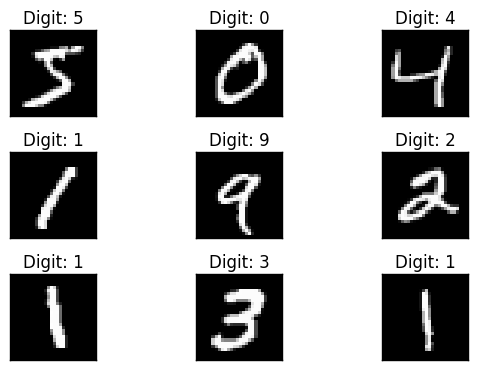

In [5]:
#visualising first 9 data from training dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
# let's print the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [8]:
#input image size 28*28
img_rows , img_cols = 28, 28

注意在tensorflow中，CNN的输入都是四维的，最后一维是“图片”的像素的长度。这里没有用到标准化，不过很多数据的前处理都是需要normalization的，这里也提及下。可以参考：[CNN 入门讲解：什么是标准化(Normalization)？](https://zhuanlan.zhihu.com/p/35597976)。

标准化主要把数据统一映射到一个特定区间，某种特定分布中。在CNN中，可能一样的事物，但是图形表达不同，所以有必要把它们映射到同一坐标系下，有相同尺度。

此外，标准化之后，梯度下降算法更容易计算。现在很多在用batch normalization，这个可以参考：[《Batch Normalization Accelerating Deep Network Training by Reducing Internal Covariate Shift》阅读笔记与实现](https://blog.csdn.net/happynear/article/details/44238541)，还有这个：[深度学习中 Batch Normalization为什么效果好？](https://www.zhihu.com/question/38102762)，这里先不多谈了。

In [9]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949], dtype=int64))


In [17]:
#set number of categories
num_category = 10

注意因为输出的结果是离散值，所以首先把数字变为类型的，二进制的。然后再进行比较。

In [19]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

接下来是重头戏，模型的基本构件方式，在tensorflow.keras中可以快速地构建神经网络模型。首先一般如果不是特别复杂的结构，可以直接使用Sequential来进行构建。

前面已经说了CNN的模型结构，这里就不赘述了，直接对下面的这个模型做些说明。首先一个卷积层，然后再卷积下，然后是一个池化，还有Dropout，最后是全连接层，两层全连接层中间有一次dropout。

关于dropout这里做些说明。

In [20]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [22]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.2120 - acc: 0.9354 - val_loss: 0.0610 - val_acc: 0.9801
Epoch 2/10
60000/60000 [==============================] - 271s 5ms/step - loss: 0.0894 - acc: 0.9737 - val_loss: 0.0422 - val_acc: 0.9861
Epoch 3/10
60000/60000 [==============================] - 270s 4ms/step - loss: 0.0677 - acc: 0.9800 - val_loss: 0.0402 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0567 - acc: 0.9834 - val_loss: 0.0332 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 271s 5ms/step - loss: 0.0472 - acc: 0.9860 - val_loss: 0.0322 - val_acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 274s 5ms/step - loss: 0.0417 - acc: 0.9870 - val_loss: 0.0297 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0371 - acc: 0.9887 - val_loss: 0.0312 - 

In [23]:
#how well did it do? 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0296396646054
Test accuracy: 0.9904


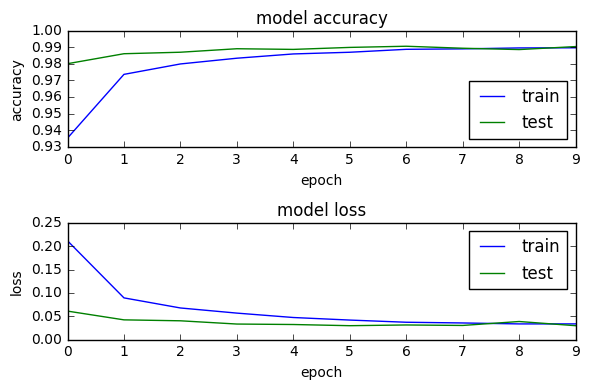

In [24]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [25]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


前面完整的展示一个模型训练和预测的过程，这里再说说模型微调的事情。

## Fine Tune

这块参考了：[CNN入门讲解：什么是微调（Fine Tune）？](https://zhuanlan.zhihu.com/p/35890660)，以及[一文看懂迁移学习：怎样用预训练模型搞定深度神经网络？](https://zhuanlan.zhihu.com/p/27657264)

微调就是已经有了一个预训练的模型，现在基于这个模型微调，因为相对于从头开始训练，微调会省去大量计算资源和计算时间，提高了计算效率，甚至提高准确率。

那么什么是预训练模型呢？预训练模型就是已经用数据集训练好的模型。现在常用的预训练模型就是他人用的常用模型。如果是调试好的优秀网络，那么就不需要修改其网络结构。

当我们被赋予一个深度学习任务时，比如说，一个涉及在图像数据集上训练卷积神经网络（Covnet）的任务，我们的第一个直觉就是从头开始训练网络。然而，实际上，从上图可以看到，**卷积神经网络会有有大量的参数（Parameters），通常在几百万的范围内**。**在小数据集（小于参数数量）上训练CNN会极大地影响CNN泛化的能力，通常会导致过度拟合**。

那么回头看看卷积神经网络的核心，它是浅层卷积层提取基础特征，深层卷积层提取抽象特征，全连接层根据特征组合分类。好，如果现在已经有了一个用了大型数据集训练的模型，说明它已经有了提取浅层基础特征和深层抽象特征的能力。如果从头开始训练，需要大量数据，计算时间和计算资源。存在模型不收敛，参数不够优化，准确率低，模型泛化能力低，容易过拟合等风险。而是用微调则可以避免上述问题。

那么什么情况下使用微调呢？

- 要使用的数据集和预训练模型的数据集相似，如果不相似，那么可想而知，因为提取的特征不同，那么直接迁移，效果也不会太好；
- 自己搭建或者使用的模型正确率太低；
- 数据集相似，但数据集数量太少；
- 计算资源太少。

在实践中更经常的是，**通过对我们拥有的较小数据集进行训练（即反向传播），对现有网络进行微调**，这些网络是在像ImageNet这样的大型数据集上进行训练的，**以达到快速训练模型的效果**。假设我们的数据集与原始数据集（例如ImageNet）的上下文没有很大不同，预先训练的模型将已经学习了与我们自己的分类问题相关的特征。

微调模型的方法:

- 特征提取：将预训练模型当做特征提取装置来使用。具体的做法是，将输出层去掉，然后将剩下的整个网络当做一个固定的特征提取机，从而应用到新的数据集中。
- 采用预训练模型的结构：可以采用预训练模型的结构，但先将所有的权重随机化，然后依据自己的数据集进行训练。
- 训练特定层，冻结其他层：对模型进行部分的训练。具体的做法是，将模型起始的一些层的权重保持不变，重新训练后面的层，得到新的权重。在这个过程中，我们可以多次进行尝试，从而能够依据结果找到frozen layers和retrain layers之间的最佳搭配。

那么大致上微调什么内容呢？

- 在CNN中通常的做法是**截断预先训练好的网络的最后一层（softmax），并用于自己的问题相关的新的softmax层替换它**。比如ImageNet上有1000个类别的softmax，自己的是10个，那么肯定要用10个类别的softmax层。然后在网络上运行预先训练的权重，确保执行交叉验证。
- 使用**较小的学习率来训练网络**，由于我们预计预先训练的权重相对于随机初始化的权重已经相当不错，我们并不想过快地扭曲它们太多，通常的做法是使初始学习率比用于从头开始训练的初始学习率小10倍。
- 如果数量集数量过少，那么进来就**只训练最后一层**，如果数据集数量中等，**冻结预训练网络的前几层的权重**也是一种常见做法。这是因为前几个图层捕捉了与我们的新问题相关的通用特征，如曲线和边。我们希望保持这些权重不变。相反，我们会让网络专注于学习后续深层中特定于数据集的特征。

如何使用与训练模型，是由数据集大小和新旧数据集(预训练的数据集和我们要解决的数据集)之间数据的相似度来决定的。不同数据集下使用微调的方式：

- 数据少，但数据相似度高，那么就只修改最后几层或最终得softmax图层的输出类别；
- 数据少，且数据相似程度低，可以冻结训练模型的初始层，比如k层，然后再训练剩余的n-k层。因为数据集的相似度低，因此根据新数据集对较高层进行重新训练具有重要意义；
- 数据量大，数据相似程度低，最好根据数据从头开始训练神经网络；
- 数据量大，数据相似程度高，直接使用在预先训练的模型中的权重，然后继续训练该模型。

总之如图所示：

![](v2-e7164c1616c9050b67d9bc069897aab9_hd.jpg)

接下来是一个例子，还是数字识别。使用vgg16作为预训练的模型结构，并把它应用到手写数字识别上。我们的训练集(MNIST)有大约60,000张左右的手写数字图片，这样的数据集显然是偏小的。所以这个问题应该属于场景一或场景二。

先只重新训练输出层 & dense layer，采用vgg16作为特征提取器。随后这些特征，会被传递到依据我们数据集训练的dense layer上。输出层同样由与我们问题相对应的softmax层函数所取代。

在vgg16中，输出层是一个拥有1000个类别的softmax层。我们把这层去掉，换上一层只有10个类别的softmax层。我们只训练这些层，然后就进行数字识别的尝试。

In [ ]:
# importing required libraries

from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
train=pd.read_csv("R/Data/Train/train.csv")
test=pd.read_csv("R/Data/test.csv")
train_path="R/Data/Train/Images/train/"
test_path="R/Data/Train/Images/test/"

from scipy.misc import imresize
# preparing the train dataset

train_img=[]
for i in range(len(train)):

    temp_img=image.load_img(train_path+train['filename'][i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)

#converting train images to array and applying mean subtraction processing

train_img=np.array(train_img) 
train_img=preprocess_input(train_img)
# applying the same procedure with the test dataset

test_img=[]
for i in range(len(test)):

    temp_img=image.load_img(test_path+test['filename'][i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)

test_img=np.array(test_img) 
test_img=preprocess_input(test_img)

# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model

features_train=model.predict(train_img)
# Extracting features from the train dataset using the VGG16 pre-trained model

features_test=model.predict(test_img)

# flattening the layers to conform to MLP input

train_x=features_train.reshape(49000,25088)
# converting target variable to array

train_y=np.asarray(train['label'])
# performing one-hot encoding for the target variable

train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
# creating training and validation set

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

 

# creating a mlp model
from keras.layers import Dense, Activation
model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 

model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid))

冻结最初几层网络的权重

这里我们将会把vgg16网络的前8层进行冻结，然后对后面的网络重新进行训练。这么做是因为最初的几层网络捕获的是曲线、边缘这种普遍的特征，这跟我们的问题是相关的。我们想要保证这些权重不变，让网络在学习过程中重点关注这个数据集特有的一些特征，从而对后面的网络进行调整。

In [ ]:
from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

from sklearn.metrics import log_loss

train=pd.read_csv("R/Data/Train/train.csv")
test=pd.read_csv("R/Data/test.csv")
train_path="R/Data/Train/Images/train/"
test_path="R/Data/Train/Images/test/"

from scipy.misc import imresize

train_img=[]
for i in range(len(train)):

    temp_img=image.load_img(train_path+train['filename'][i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)

train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

test_img=[]
for i in range(len(test)):

temp_img=image.load_img(test_path+test['filename'][i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)

test_img=np.array(test_img) 
test_img=preprocess_input(test_img)


from keras.models import Model

def vgg16_model(img_rows, img_cols, channel=1, num_classes=None):

    model = VGG16(weights='imagenet', include_top=True)

    model.layers.pop()

    model.outputs = [model.layers[-1].output]

    model.layers[-1].outbound_nodes = []

          x=Dense(num_classes, activation='softmax')(model.output)

    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

          for layer in model.layers[:8]:

       layer.trainable = False

# Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

train_y=np.asarray(train['label'])

le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.2, random_state=42)

# Example to fine-tune on 3000 samples from Cifar10

img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 10 
batch_size = 16 
nb_epoch = 10

# Load our model
model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning
model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

# Make predictions
predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)

## 可视化

在水文水资源方面应用机器学习的方法，比较重要的一个问题就是如何解释。关于解释模型，一个重要得手段就是可视化。关于可视化，先摆出一些blog，可以参考：[绝妙可视化：什么是深度学习的卷积？](https://zhuanlan.zhihu.com/p/42090228)，[利用Python实现卷积神经网络的可视化](https://zhuanlan.zhihu.com/p/34928578)，[CNN 入门讲解：图片在卷积神经网络中是怎么变化的（前向传播 Forward Propagation）？](https://zhuanlan.zhihu.com/p/34222451)，[Deep Visualization:可视化并理解CNN](https://zhuanlan.zhihu.com/p/24833574)，[卷积神经网络(CNN)的理解与可视化](https://zhuanlan.zhihu.com/p/21699462)，[可视化CapsNet，详解Hinton等人提出的胶囊概念与原理](https://zhuanlan.zhihu.com/p/35406544)，[一个可视化网站](https://cs.ryerson.ca/~aharley/vis/conv/flat.html)

## CNN in NLP

水文水资源上使用CNN，相比于图像识别，感觉上和NLP问题更接近一些，因此这里参考一文：[Understanding Convolutional Neural Networks for NLP](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/)，简单了解下一些相似之处。

首先对于一句话， each row is vector that represents a word. 也就是每行一个词，是一个独立的向量。这是这个“图像”的特别之处。

因此，在NLP中，典型地是用一个slide整个行的卷积核来进行卷积操作，也就是说filter的宽度通常就是输入矩阵的宽度。高度是可以变化的，不过对于NLP，一个语句的词元之间的联系，通常也是近的联系多，因此通常是2－5个单词的长度的sliding window。这样的话，一个对NLP的CNN看起来就像是这样的了：

![](Screen-Shot-2015-11-06-at-12.05.40-PM-1024x937.png)

这个例子是用了三个不同的filter region大－－2，3，4，每个大小用了两个filters，每个filter在原矩阵上执行卷积操作，来生成特征图。然后对每个特征图执行池化，这样所有6个图最后就生出来6个单个大小的特征值，拼成一个一维6大小向量。最后用了一个softmax函数来对句子进行了分类。这里假设的是一个二元分类问题。

对于图像，CNN的使用有一些直觉，但是对NLP，好像直觉理解就没有那么多了。所以似乎CNN不适合NLP问题，而RNN更适合。不过  All models are wrong, but some are useful 。 事实证明CNN是可以用于NLP的。 

一个原因就是CNN非常快，因为GPU的关系，CNN更容易表达。

接下来看看注意哪些参数。

### Narrow vs. Wide convolution

这块就是说zero-padding，也就是wide convolution。不用zero－padding就是narrow convolution，像这样(Filter size 5, input size 7)：

![](Screen-Shot-2015-11-05-at-9.47.41-AM-1024x261.png)

左边是narrow的，右边是wide的。

### Stride Size

stride size, defining by how much you want to shift your filter at each step. 

![](Screen-Shot-2015-11-05-at-10.18.08-AM-1024x251.png)

### Pooling Layers

池化层subsample其输入。通常是maxpooling。不过不必要对全部matrix池化，也是使用window来池化。

![](Screen-Shot-2015-11-05-at-2.18.38-PM-1024x534.png)

### Channels

Channel是对输入数据的不同维度视角的看法。可以跨channels卷积，每个都有不同或相同的权重。关于channel的理解可以参考：[CNN中feature map、卷积核、卷积核个数、filter、channel的概念解释，以及CNN 学习过程中卷积核更新的理解](https://blog.csdn.net/xys430381_1/article/details/82529397)。

tensorflow 中给出的，对于输入样本中 channels 的含义。一般的RGB图片，channels 数量是 3 （红、绿、蓝）；而monochrome图片，channels 数量是 1 。

mxnet 中提到的，一般 channels 的含义是，每个卷积层中卷积核的数量。

假如6×6×3 的图片样本，3×3×3 的卷积核（filter）进行卷积操作，此时输入图片的 channels 为 3，而卷积核中的 in_channels 与 需要进行卷积操作的数据的 channels 一致（这里就是图片样本，为3）。

接下来，进行卷积操作，卷积核中的27个数字与分别与样本对应相乘后，再进行求和，得到第一个结果。依次进行，最终得到 4×4 的结果。

![](20180404113714719.png)

由于只有一个卷积核，所以最终得到的结果为 4×4×1 ， out_channels 为 1 。在实际应用中，都会使用多个卷积核。这里如果再加一个卷积核，就会得到 4×4×2 的结果。

![](20180404150134375.png)

总结一下，我偏好把上面提到的 channels 分为三种：

- 最初输入的图片样本的 channels ，取决于图片类型，比如RGB；
- 卷积核中的 in_channels ，就是要操作的图像数据的feather  map张数，也就是卷积核的深度。（刚刚2中已经说了，就是上一次卷积的 out_channels ，如果是第一次做卷积，就是1中样本图片的 channels） ；
- 卷积操作完成后输出的 out_channels ，取决于卷积核的数量（下层将产生的feather map数量）。此时的 out_channels 也会作为下一次卷积时的卷积核的 in_channels。

说到这里，相信已经把 channels 讲的很清楚了。在CNN中，想搞清楚每一层的传递关系，主要就是 height,width 的变化情况，和 channels 的变化情况。